# Variance & Standard Deviation
Variance measures how far a set of numbers are spread out from their average value. It quantifies the degree of variation or dispersion in a dataset. Standard deviation is the square root of variance, providing a measure of spread in the same units as the original data.

- **Measures spread:** Higher variance = more spread out data
- **Squared units:** Variance is in squared units of the original data
- **Sensitive to outliers:** Extreme values significantly increase variance
- **Population vs Sample:** Different formulas for population vs sample data
- **Foundation for other metrics:** Standard deviation is derived from variance

Formulas:
1. Population Variance (**σ²**) used when you have data for the entire population:
 $$σ² = \frac{Σ (x_i - μ)²}{N}$$  
 where **μ** is the population mean and **N** is the population size.

2. Sample Variance (**s²**) used when you have a sample from a population (uses Bessel's correction - n-1):
 $$s² = \frac{Σ (xᵢ - x̄)²}{(n - 1)}$$
 where **x̄** is the sample mean and **n** is the sample size.

**Why n-1?** This correction (degrees of freedom) makes the sample variance an unbiased estimator of the population variance.


##### Why Use Variance?
Advantages:
- **Uses all data points:** Considers every value in the dataset
- **Mathematically convenient:** Nice mathematical properties for calculations
- **Foundation for other concepts:** Basis for standard deviation, ANOVA, regression
- **Measures variability precisely:** More informative than range

Limitations:
- **Squared units:** Hard to interpret in original data units
- **Sensitive to outliers:** Extreme values disproportionately affect variance
- **Not intuitive:** Standard deviation is more commonly used for interpretation

## Implementation

### 1. Basic Variance Calculation

In [1]:
import numpy as np

# Sample dataset
data = [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]

# Manual calculation
def calculate_variance_manual(data, is_sample=True):
    mean = sum(data) / len(data)
    squared_differences = [(x - mean) ** 2 for x in data]
    sum_squared_diff = sum(squared_differences)
    
    if is_sample and len(data) > 1:
        variance = sum_squared_diff / (len(data) - 1)  # Sample variance
    else:
        variance = sum_squared_diff / len(data)  # Population variance
    
    return variance, mean, squared_differences

variance_manual, mean, squared_diffs = calculate_variance_manual(data, is_sample=True)

print(f"Dataset: {data}")
print(f"Mean: {mean:.2f}")
print(f"Squared differences from mean: {[f'{x:.2f}' for x in squared_diffs]}")
print(f"Sum of squared differences: {sum(squared_diffs):.2f}")
print(f"Sample Variance (manual): {variance_manual:.2f}")

Dataset: [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
Mean: 53.70
Squared differences from mean: ['942.49', '75.69', '176.89', '388.09', '1246.09', '5.29', '136.89', '1738.89', '590.49', '1391.29']
Sum of squared differences: 6692.10
Sample Variance (manual): 743.57


### 2. Using NumPy

In [2]:
import numpy as np

data = [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]

# Sample variance (default)
sample_variance = np.var(data, ddof=1)  # ddof=1 for sample variance
# Population variance
population_variance = np.var(data, ddof=0)  # ddof=0 for population variance

print(f"Dataset: {data}")
print(f"Sample Variance (n-1): {sample_variance:.2f}")
print(f"Population Variance (n): {population_variance:.2f}")

# Using separate functions
print(f"np.var(data, ddof=1): {np.var(data, ddof=1):.2f}")
print(f"np.var(data, ddof=0): {np.var(data, ddof=0):.2f}")

Dataset: [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
Sample Variance (n-1): 743.57
Population Variance (n): 669.21
np.var(data, ddof=1): 743.57
np.var(data, ddof=0): 669.21


### 3. Using pandas (for DataFrames)

In [6]:
import pandas as pd
import numpy as np

# Create a DataFrame with different datasets
data = {
    'low_variance': [48, 50, 52, 51, 49, 50, 51, 52, 49, 50],
    'high_variance': [10, 90, 5, 95, 15, 85, 20, 80, 25, 75],
    'normal_variance': [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
}

df = pd.DataFrame(data)

print("DataFrame:")
print(df.head())

# Variance for each column
print("\nVariance Analysis:")
for column in df.columns:
    sample_var = df[column].var()  # pandas default is sample variance (ddof=1)
    population_var = df[column].var(ddof=0)  # population variance
    mean_val = df[column].mean()
    std_dev = df[column].std() # Standard deviation is sqrt of variance
    
    print(f"\n{column}:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Sample Variance: {sample_var:.2f}")
    print(f"  Population Variance: {population_var:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}")

# Using describe() for comprehensive statistics
print("\nComprehensive Statistics:")
print(df.describe())

DataFrame:
   low_variance  high_variance  normal_variance
0            48             10               23
1            50             90               45
2            52              5               67
3            51             95               34
4            49             15               89

Variance Analysis:

low_variance:
  Mean: 50.20
  Sample Variance: 1.73
  Population Variance: 1.56
  Standard Deviation: 1.32

high_variance:
  Mean: 50.00
  Sample Variance: 1416.67
  Population Variance: 1275.00
  Standard Deviation: 37.64

normal_variance:
  Mean: 53.70
  Sample Variance: 743.57
  Population Variance: 669.21
  Standard Deviation: 27.27

Comprehensive Statistics:
       low_variance  high_variance  normal_variance
count     10.000000      10.000000        10.000000
mean      50.200000      50.000000        53.700000
std        1.316561      37.638633        27.268419
min       48.000000       5.000000        12.000000
25%       49.250000      16.250000        36.000000
50

## Standard Deviation

In [13]:
### Standard Deviation - The Interpretable Sibling

def variance_vs_standard_deviation():
    data = [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
    
    variance = np.var(data, ddof=1)
    std_dev = np.std(data, ddof=1)
    mean_val = np.mean(data)
    
    print(f"Dataset: {data}")
    print(f"Mean: {mean_val:.2f}")
    print(f"Variance: {variance:.2f} (squared units)")
    print(f"Standard Deviation: {std_dev:.2f} (original units)")
    print(f"Verification: √{variance:.2f} = {np.sqrt(variance):.2f}")
    
    # Interpretation using empirical rule (68-95-99.7 rule)
    print(f"\nEmpirical Rule (for normal distributions):")
    print(f"~68% of data within: {mean_val-std_dev:.1f} to {mean_val+std_dev:.1f}")
    print(f"~95% of data within: {mean_val-2*std_dev:.1f} to {mean_val+2*std_dev:.1f}")
    print(f"~99.7% of data within: {mean_val-3*std_dev:.1f} to {mean_val+3*std_dev:.1f}")

variance_vs_standard_deviation()

Dataset: [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
Mean: 53.70
Variance: 743.57 (squared units)
Standard Deviation: 27.27 (original units)
Verification: √743.57 = 27.27

Empirical Rule (for normal distributions):
~68% of data within: 26.4 to 81.0
~95% of data within: -0.8 to 108.2
~99.7% of data within: -28.1 to 135.5


## Advanced Usage


### 1. Variance in Multiple Dimensions

In [11]:
import numpy as np
import pandas as pd

def multivariate_variance():
    # Dataset with multiple features
    data = {
        'age': [25, 30, 35, 40, 45, 50, 55, 60],
        'income': [50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000],
        'spending': [20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000]
    }
    
    df = pd.DataFrame(data)
    
    print("Multivariate Variance Analysis:")
    print(df)
    
    # Covariance matrix - shows variance on diagonal
    covariance_matrix = df.cov()
    print("\nCovariance Matrix (diagonal = variances):")
    print(covariance_matrix)
    
    # Variance along different axes
    print("\nVariance Summary:")
    for column in df.columns:
        variance = df[column].var()
        std_dev = df[column].std()
        print(f"{column}: Variance = {variance:,.2f}, Std Dev = {std_dev:,.2f}")
    
    # Coefficient of Variation (CV) = std/mean
    print("\nCoefficient of Variation (CV = Std Dev / Mean):")
    for column in df.columns:
        cv = df[column].std() / df[column].mean()
        print(f"{column}: CV = {cv:.3f} ({cv*100:.1f}%)")
    
    return df, covariance_matrix

df_multi, cov_matrix = multivariate_variance()

Multivariate Variance Analysis:
   age  income  spending
0   25   50000     20000
1   30   55000     22000
2   35   60000     24000
3   40   65000     26000
4   45   70000     28000
5   50   75000     30000
6   55   80000     32000
7   60   85000     34000

Covariance Matrix (diagonal = variances):
               age       income    spending
age          150.0     150000.0     60000.0
income    150000.0  150000000.0  60000000.0
spending   60000.0   60000000.0  24000000.0

Variance Summary:
age: Variance = 150.00, Std Dev = 12.25
income: Variance = 150,000,000.00, Std Dev = 12,247.45
spending: Variance = 24,000,000.00, Std Dev = 4,898.98

Coefficient of Variation (CV = Std Dev / Mean):
age: CV = 0.288 (28.8%)
income: CV = 0.181 (18.1%)
spending: CV = 0.181 (18.1%)


### 2. Variance Decomposition

In [14]:
### Variance Decomposition (Total = Explained + Unexplained)

def variance_decomposition_example():
    # Example: explaining height variance by age groups
    np.random.seed(42)
    
    # Different age groups with different average heights
    young = np.random.normal(165, 5, 30)  # mean=165cm, std=5
    middle = np.random.normal(170, 5, 30)  # mean=170cm, std=5  
    old = np.random.normal(167, 5, 30)    # mean=167cm, std=5
    
    all_heights = np.concatenate([young, middle, old])
    groups = ['Young']*30 + ['Middle']*30 + ['Old']*30
    
    df = pd.DataFrame({'height': all_heights, 'age_group': groups})
    
    # Total variance
    total_variance = df['height'].var()
    
    # Within-group variance (unexplained)
    within_group_var = df.groupby('age_group')['height'].var().mean()
    
    # Between-group variance (explained by age groups)
    group_means = df.groupby('age_group')['height'].mean()
    overall_mean = df['height'].mean()
    between_group_var = ((group_means - overall_mean)**2).mean()
    
    print("Variance Decomposition:")
    print(f"Total Variance: {total_variance:.2f}")
    print(f"Between-group Variance: {between_group_var:.2f}")
    print(f"Within-group Variance: {within_group_var:.2f}")
    print(f"Sum check: {between_group_var + within_group_var:.2f}")
    print(f"Explained by age groups: {(between_group_var/total_variance)*100:.1f}%")

variance_decomposition_example()

Variance Decomposition:
Total Variance: 26.50
Between-group Variance: 4.77
Within-group Variance: 22.17
Sum check: 26.94
Explained by age groups: 18.0%


### 3. Robust Variance Measures

In [15]:
### Robust Alternatives to Variance

def robust_variance_measures():
    # Data with outliers
    normal_data = [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
    outlier_data = [45, 46, 47, 48, 49, 50, 51, 52, 53, 200]  # One extreme outlier
    
    datasets = {'Normal': normal_data, 'With_Outlier': outlier_data}
    
    for name, data in datasets.items():
        print(f"\n{name} Dataset: {data}")
        
        # Traditional measures
        variance = np.var(data, ddof=1)
        std_dev = np.std(data, ddof=1)
        
        # Robust measures
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        mad = np.median(np.abs(data - np.median(data)))  # Median Absolute Deviation
        
        print(f"Variance: {variance:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print(f"IQR (Interquartile Range): {iqr:.2f}")
        print(f"MAD (Median Absolute Deviation): {mad:.2f}")

robust_variance_measures()


Normal Dataset: [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
Variance: 9.17
Standard Deviation: 3.03
IQR (Interquartile Range): 4.50
MAD (Median Absolute Deviation): 2.50

With_Outlier Dataset: [45, 46, 47, 48, 49, 50, 51, 52, 53, 200]
Variance: 2286.77
Standard Deviation: 47.82
IQR (Interquartile Range): 4.50
MAD (Median Absolute Deviation): 2.50


### 4. Variance in Statistical Tests

In [16]:
### Variance in Hypothesis Testing

def variance_testing():
    # F-test for comparing variances
    from scipy import stats
    
    group1 = np.random.normal(50, 5, 30)   # Same mean, different variance
    group2 = np.random.normal(50, 10, 30)
    
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    
    # F-test for equal variances
    f_statistic = var1 / var2 if var1 > var2 else var2 / var1
    p_value = 2 * (1 - stats.f.cdf(f_statistic, 29, 29))
    
    print("Testing Equal Variances (F-test):")
    print(f"Group 1 variance: {var1:.2f}")
    print(f"Group 2 variance: {var2:.2f}")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Equal variances? {'No' if p_value < 0.05 else 'Yes'} (α=0.05)")

variance_testing()

Testing Equal Variances (F-test):
Group 1 variance: 20.65
Group 2 variance: 104.89
F-statistic: 5.08
P-value: 0.0000
Equal variances? No (α=0.05)


### 5. Rolling Variance for Time Series

Time Series with Rolling Variance:
             returns  rolling_variance  rolling_std
date                                               
2024-03-31  0.194155          4.513512     2.124503
2024-04-01  1.937290          4.212889     2.052532
2024-04-02 -1.404106          4.307550     2.075464
2024-04-03 -0.655324          3.738712     1.933575
2024-04-04 -0.784216          2.407888     1.551737
2024-04-05 -2.927030          2.631422     1.622166
2024-04-06  0.592241          2.660648     1.631149
2024-04-07  0.522111          2.684752     1.638521
2024-04-08  0.010227          2.678995     1.636764
2024-04-09 -0.469174          1.908878     1.381621


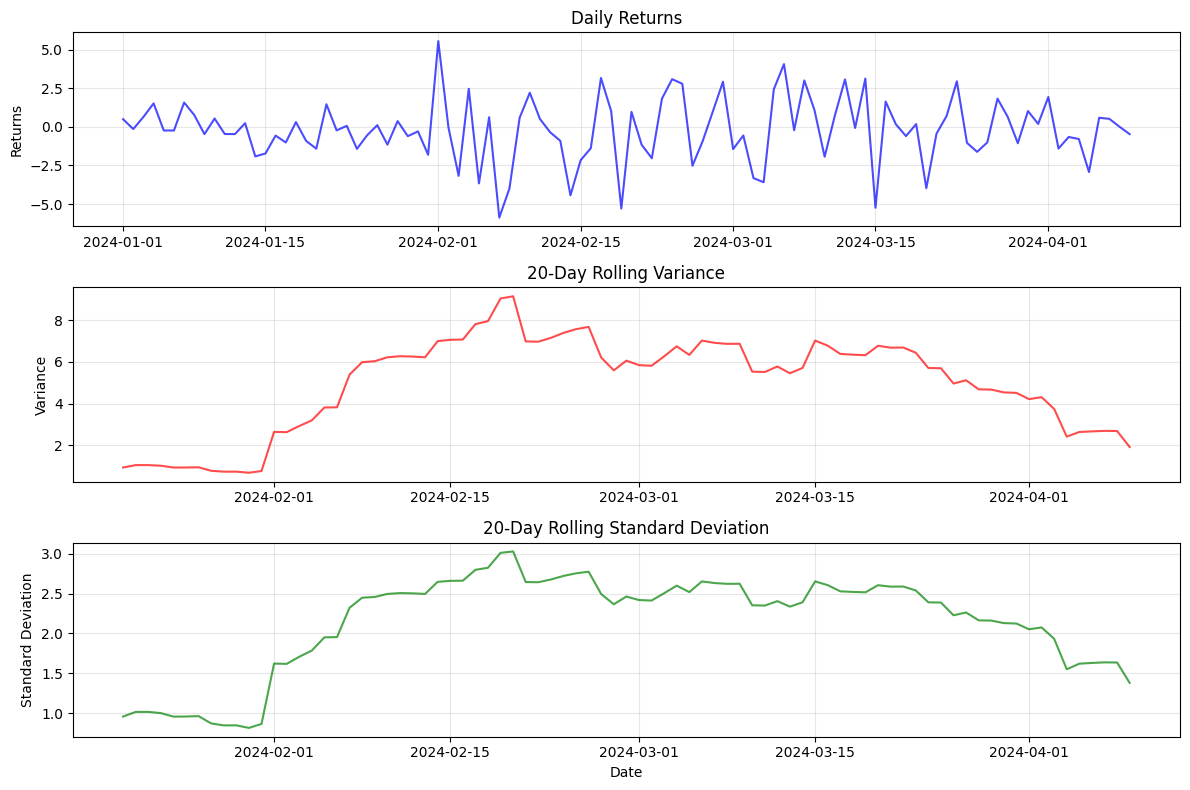


High Volatility Periods (Variance > 4):
Start: 2024-02-07
End: 2024-04-02
Duration: 56 days


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rolling_variance_analysis():
    # Create time series data with changing volatility
    np.random.seed(42)
    dates = pd.date_range('2024-01-01', periods=100, freq='D')
    
    # Generate data with different variance regimes
    low_vol = np.random.normal(0, 1, 30)
    high_vol = np.random.normal(0, 3, 40)
    medium_vol = np.random.normal(0, 2, 30)
    
    returns = np.concatenate([low_vol, high_vol, medium_vol])
    
    # Create DataFrame
    ts_data = pd.DataFrame({
        'date': dates,
        'returns': returns
    })
    ts_data = ts_data.set_index('date')
    
    # Calculate rolling variance (20-day window)
    ts_data['rolling_variance'] = ts_data['returns'].rolling(window=20).var()
    ts_data['rolling_std'] = ts_data['returns'].rolling(window=20).std()
    
    print("Time Series with Rolling Variance:")
    print(ts_data.tail(10))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Original returns
    plt.subplot(3, 1, 1)
    plt.plot(ts_data.index, ts_data['returns'], color='blue', alpha=0.7)
    plt.title('Daily Returns')
    plt.ylabel('Returns')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Rolling variance
    plt.subplot(3, 1, 2)
    plt.plot(ts_data.index, ts_data['rolling_variance'], color='red', alpha=0.7)
    plt.title('20-Day Rolling Variance')
    plt.ylabel('Variance')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Rolling standard deviation
    plt.subplot(3, 1, 3)
    plt.plot(ts_data.index, ts_data['rolling_std'], color='green', alpha=0.7)
    plt.title('20-Day Rolling Standard Deviation')
    plt.ylabel('Standard Deviation')
    plt.xlabel('Date')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Identify high volatility periods
    high_vol_periods = ts_data[ts_data['rolling_variance'] > 4]
    if not high_vol_periods.empty:
        print(f"\nHigh Volatility Periods (Variance > 4):")
        print(f"Start: {high_vol_periods.index[0].strftime('%Y-%m-%d')}")
        print(f"End: {high_vol_periods.index[-1].strftime('%Y-%m-%d')}")
        print(f"Duration: {len(high_vol_periods)} days")
    
    return ts_data

ts_data = rolling_variance_analysis()

**Key Python Functions Summary**

| Function                   | Library      | Usage                | Parameters                                      |
|----------------------------|--------------|----------------------|-------------------------------------------------|
| `np.var(data, ddof=1)`     | NumPy        | Sample variance      | `ddof=1` for sample, `ddof=0` for population    |
| `pd.Series.var()`          | pandas       | Sample variance      | Default is `ddof=1`                             |
| `pd.Series.var(ddof=0)`    | pandas       | Population variance  | Explicitly set `ddof=0`                         |
| `statistics.variance()`    | statistics   | Sample variance      | Built-in module for basic stats                 |
| `statistics.pvariance()`   | statistics   | Population variance  | Built-in module                                 |

Practical Insights
- Low variance → Data points are close to the mean (consistent)
- High variance → Data points are spread out (variable)
- Always specify whether you're calculating population or sample variance
- Variance + Standard Deviation together give complete picture of spread
- **In machine learning:** Variance is crucial for feature selection, model evaluation, and understanding overfitting

Variance is fundamental to understanding data variability and is the building block for many advanced statistical concepts and machine learning algorithms!

